**THEORETICAL**

1. What is unsupervised learning in the context of machine learning?

Unsupervised learning is a machine learning approach where the algorithm learns from unlabeled data. The system identifies patterns, clusters, or groupings without prior knowledge of the outcomes.

2. How does K-Means clustering algorithm work?

K-Means works by:

Initializing K random centroids

Assigning each point to the nearest centroid

Updating centroids as the mean of the assigned points

Repeating until convergence

3. Explain the concept of a dendrogram in hierarchical clustering.

A dendrogram is a tree-like plot showing how clusters are merged in hierarchical clustering. Cutting the dendrogram at a chosen height gives the desired number of clusters.

4. What is the main difference between K-Means and Hierarchical Clustering?

K-Means requires predefined clusters and is efficient, while Hierarchical Clustering doesn't need the number of clusters upfront and provides a tree structure but is computationally more expensive.

5. What are the advantages of DBSCAN over K-Means?

Handles clusters of varying shapes and densities

Does not require specifying the number of clusters

Detects outliers as noise automatically

6. When would you use Silhouette Score in clustering?

Silhouette Score evaluates how well clusters are separated and how compact they are. It’s used to determine the optimal number of clusters and assess clustering quality.

7. What are the limitations of Hierarchical Clustering?

Not scalable for large datasets

Sensitive to noise and outliers

Once merged or split, it can't be undone

8. Why is feature scaling important in clustering algorithms like K-Means?

Feature scaling ensures all variables contribute equally by bringing them to a common scale. Otherwise, larger-scale features dominate distance calculations.

9. How does DBSCAN identify noise points?

DBSCAN labels points as noise if they have fewer than min_samples neighbors within eps distance, meaning they don’t belong to any cluster.

10. Define inertia in the context of K-Means.

Inertia is the sum of squared distances between each data point and its assigned cluster center. Lower inertia indicates more compact clusters.

11. What is the elbow method in K-Means clustering?

It’s a graphical method to determine the optimal number of clusters by plotting inertia vs number of clusters. The "elbow" point where inertia reduction slows indicates the best K.

12. Describe the concept of "density" in DBSCAN.

Density refers to how closely packed data points are. DBSCAN forms clusters based on dense regions, where each point must have a minimum number of neighbors within a specified radius.

13. Can hierarchical clustering be used on categorical data?

Yes, with appropriate distance metrics like Hamming distance or using encoding techniques like one-hot encoding, hierarchical clustering can be applied.

14. What does a negative Silhouette Score indicate?

A negative silhouette score means a sample is closer to another cluster than its own, indicating poor clustering or misclassification.

15. Explain the term "linkage criteria" in hierarchical clustering.

Linkage criteria determine how distances between clusters are calculated:

Single: minimum pairwise distance

Complete: maximum pairwise distance

Average: average pairwise distance

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

Because K-Means assumes clusters are spherical and equally sized, it struggles with irregular shapes, sizes, or densities, leading to incorrect assignments.

17. What are the core parameters in DBSCAN, and how do they influence clustering?

eps: radius around a point

min_samples: minimum neighbors to form a core point
Higher eps merges clusters; higher min_samples increases strictness.

18. How does K-Means++ improve upon standard K-Means initialization?

K-Means++ selects initial centroids more systematically, increasing distance between them, leading to better convergence and avoiding poor local minima.

19. What is agglomerative clustering?

Agglomerative clustering is a bottom-up approach where each data point starts as its own cluster, and clusters are merged iteratively based on similarity.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?

Inertia only measures compactness; Silhouette Score considers both compactness and separation, offering a more comprehensive evaluation of clustering quality.

21. How does noise affect clustering results in DBSCAN?

Noise points (outliers) are excluded from clusters, making DBSCAN robust to outliers but possibly ignoring relevant sparse points.

22. Can K-Means be used for non-spherical clusters?

No, K-Means works best for spherical, equally sized clusters. It performs poorly on elongated or irregularly shaped clusters.

23. Why is distance metric important in clustering algorithms?

The choice of distance metric (Euclidean, Manhattan, etc.) affects how clusters are formed and can significantly change the outcome.

24. What are core, border, and noise points in DBSCAN?

Core: Has enough neighbors (≥ min_samples)

Border: Fewer neighbors but close to a core point

Noise: Not within eps of any core point

**PRACTICAL**

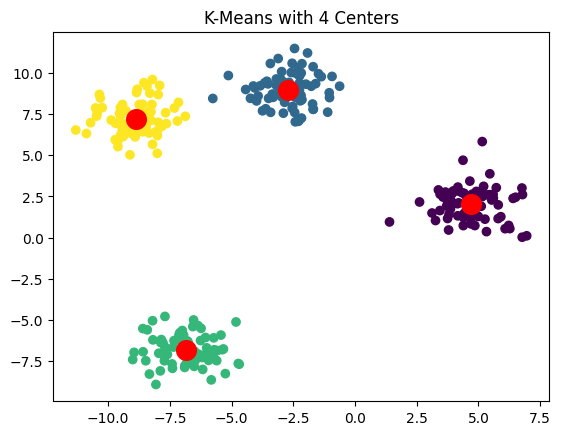

In [1]:
# Q25: KMeans with 4 centers using make_blobs
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("K-Means with 4 Centers")
plt.show()


In [2]:
# Q26: Agglomerative Clustering on Iris
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


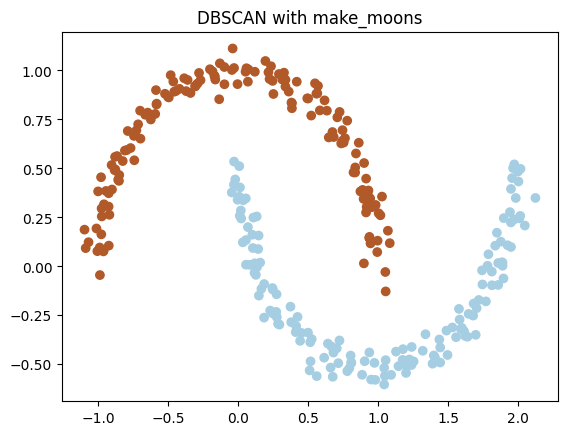

In [3]:
# Q27: DBSCAN on make_moons with outliers
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired')
plt.title("DBSCAN with make_moons")
plt.show()


In [4]:
# Q28: KMeans on Wine Dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import numpy as np

data = load_wine()
X = StandardScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


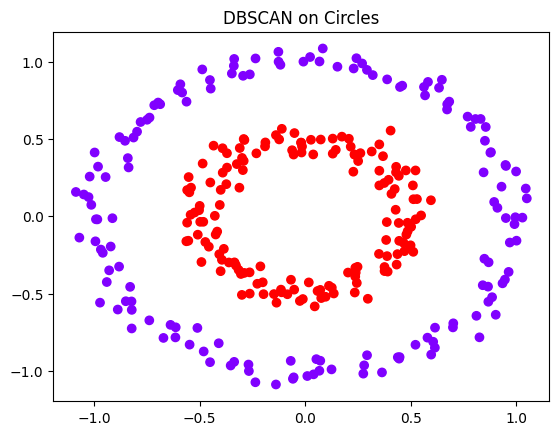

In [5]:
# Q29: DBSCAN on make_circles
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("DBSCAN on Circles")
plt.show()


In [6]:
# Q30: KMeans on Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print("Centroids:\n", kmeans.cluster_centers_)


Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


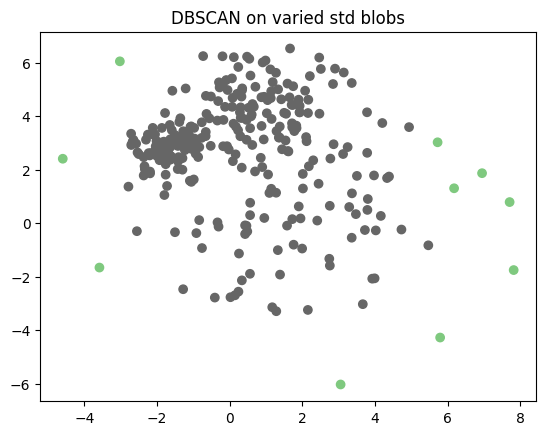

In [7]:
# Q31: DBSCAN on blobs with varied std dev
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=0)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("DBSCAN on varied std blobs")
plt.show()


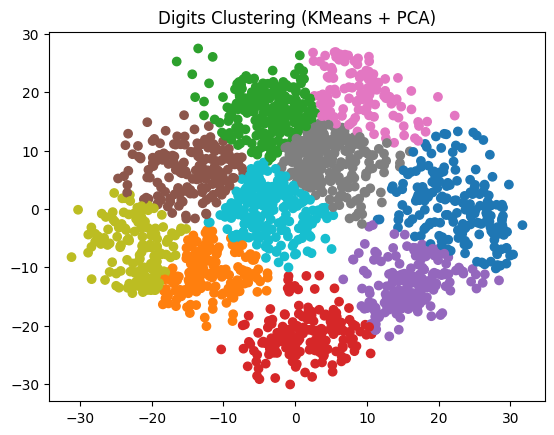

In [8]:
# Q32: KMeans + PCA on Digits Dataset
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.title("Digits Clustering (KMeans + PCA)")
plt.show()


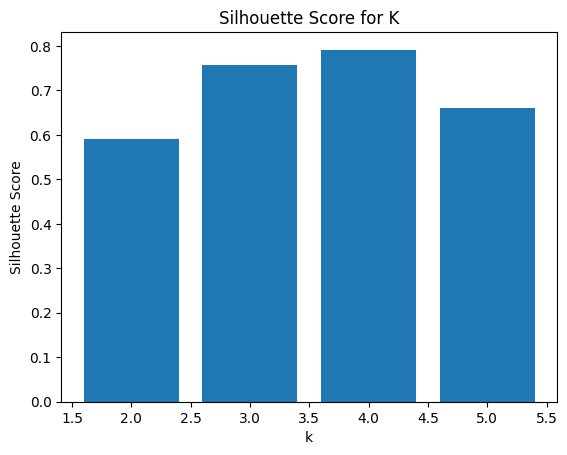

In [9]:
# Q33: Silhouette scores for k=2 to 5
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
scores = []
k_values = range(2, 6)

for k in k_values:
    km = KMeans(n_clusters=k).fit(X)
    scores.append(silhouette_score(X, km.labels_))

plt.bar(k_values, scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K")
plt.show()


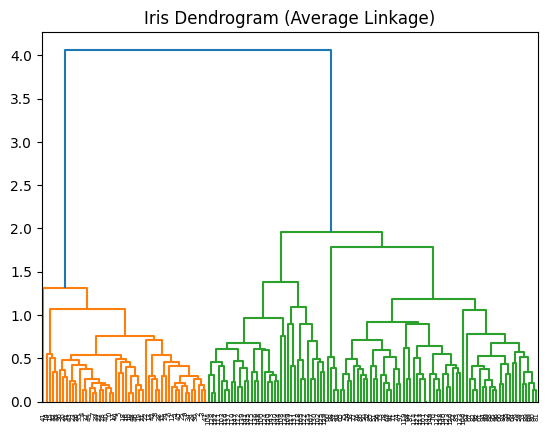

In [10]:
# Q34: Dendrogram with Iris Dataset
from scipy.cluster.hierarchy import dendrogram, linkage

X = load_iris().data
link = linkage(X, method='average')
dendrogram(link)
plt.title("Iris Dendrogram (Average Linkage)")
plt.show()


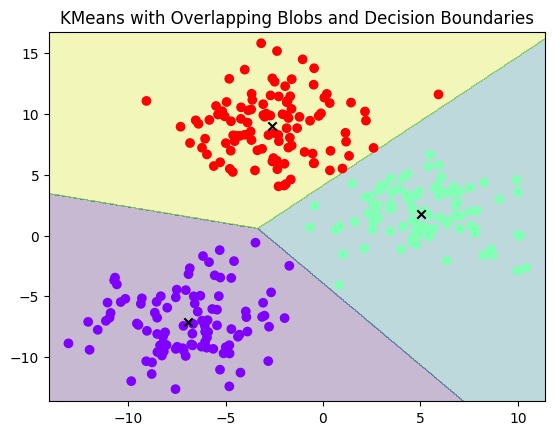

In [11]:
# Q35: KMeans with overlapping blobs and decision boundaries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
kmeans = KMeans(n_clusters=3).fit(X)

# Plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x')
plt.title("KMeans with Overlapping Blobs and Decision Boundaries")
plt.show()


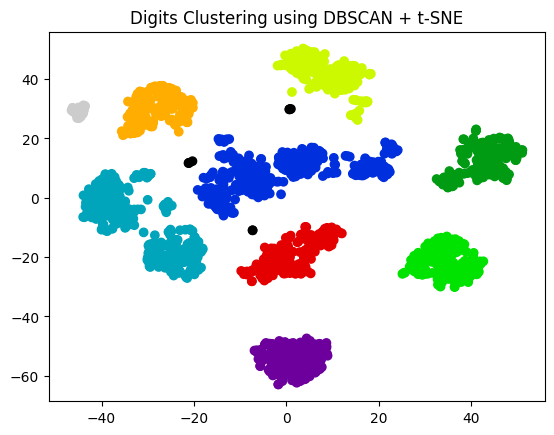

In [12]:
# Q36: DBSCAN + t-SNE on Digits Dataset
from sklearn.manifold import TSNE

digits = load_digits()
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='nipy_spectral')
plt.title("Digits Clustering using DBSCAN + t-SNE")
plt.show()


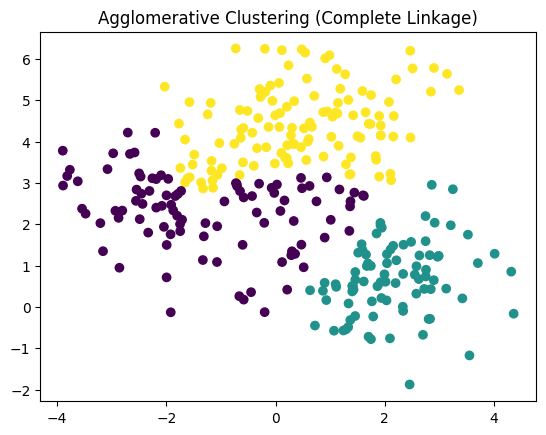

In [13]:
# Q37: Agglomerative Clustering with complete linkage
X, _ = make_blobs(n_samples=300, centers=3, random_state=0)
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


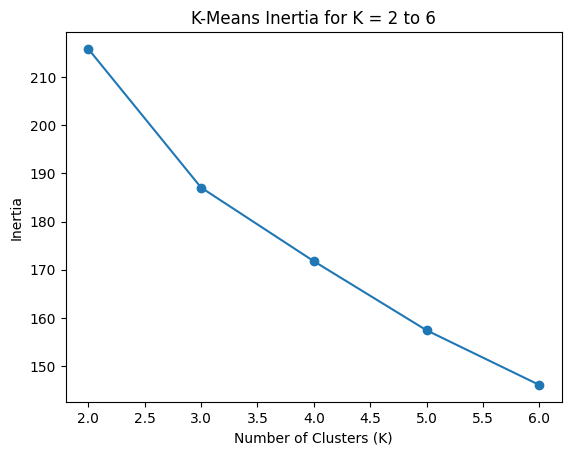

In [14]:
# Q38: Inertia comparison for K = 2 to 6
X = MinMaxScaler().fit_transform(load_breast_cancer().data)
inertias = []

for k in range(2, 7):
    km = KMeans(n_clusters=k).fit(X)
    inertias.append(km.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("K-Means Inertia for K = 2 to 6")
plt.show()


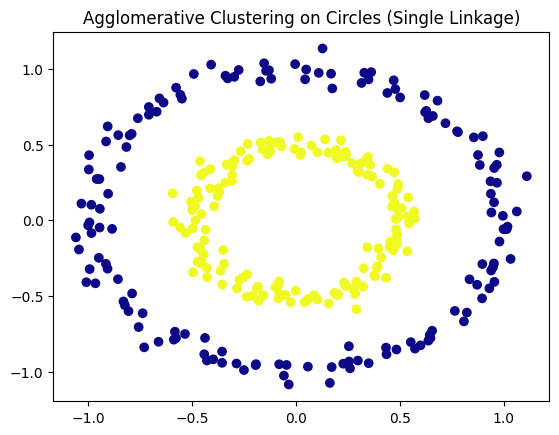

In [15]:
# Q39: Agglomerative Clustering on make_circles (single linkage)
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("Agglomerative Clustering on Circles (Single Linkage)")
plt.show()


In [16]:
# Q40: DBSCAN on Wine Dataset (Count Clusters)
X = StandardScaler().fit_transform(load_wine().data)
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(X)
labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


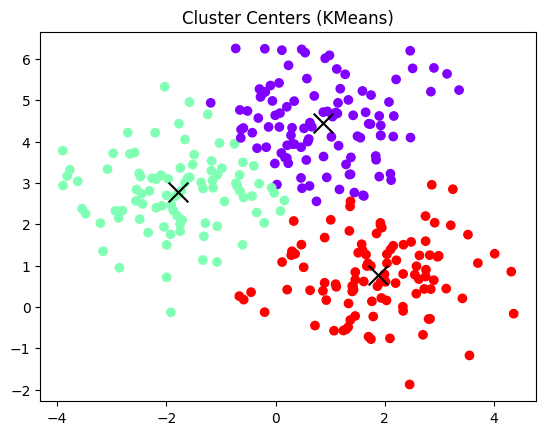

In [17]:
# Q41: KMeans centers on make_blobs data
X, _ = make_blobs(n_samples=300, centers=3, random_state=0)
kmeans = KMeans(n_clusters=3).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='x')
plt.title("Cluster Centers (KMeans)")
plt.show()


In [18]:
# Q42: DBSCAN on Iris - Count Noise
X = load_iris().data
X = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
labels = dbscan.labels_

n_noise = list(labels).count(-1)
print("Number of noise points:", n_noise)


Number of noise points: 34


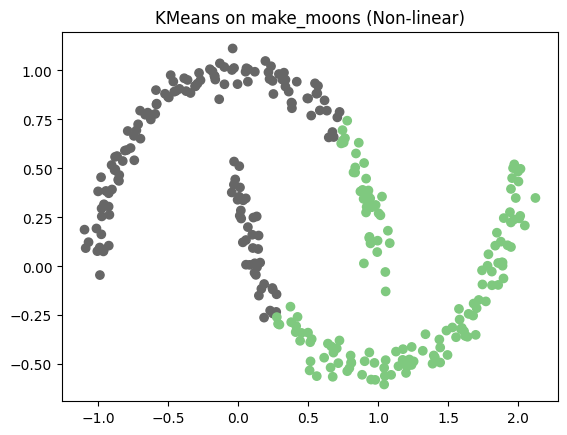

In [19]:
# Q43: KMeans on non-linear make_moons
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='Accent')
plt.title("KMeans on make_moons (Non-linear)")
plt.show()


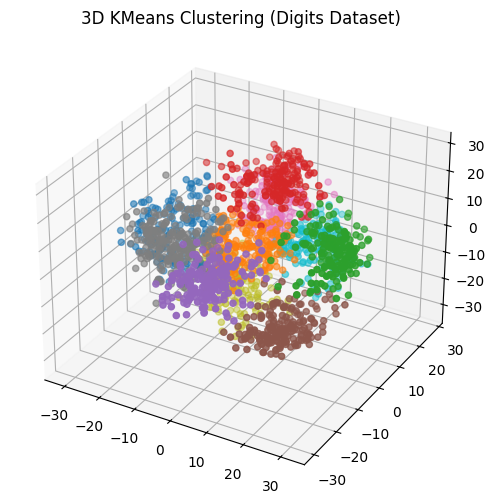

In [20]:
# Q44: 3D PCA + KMeans on Digits
from mpl_toolkits.mplot3d import Axes3D

X = PCA(n_components=3).fit_transform(load_digits().data)
kmeans = KMeans(n_clusters=10).fit(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap='tab10')
ax.set_title("3D KMeans Clustering (Digits Dataset)")
plt.show()


In [21]:
# Q45: Silhouette Score for KMeans on 5-center blobs
X, _ = make_blobs(n_samples=300, centers=5, random_state=0)
kmeans = KMeans(n_clusters=5).fit(X)
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.5616042058923767


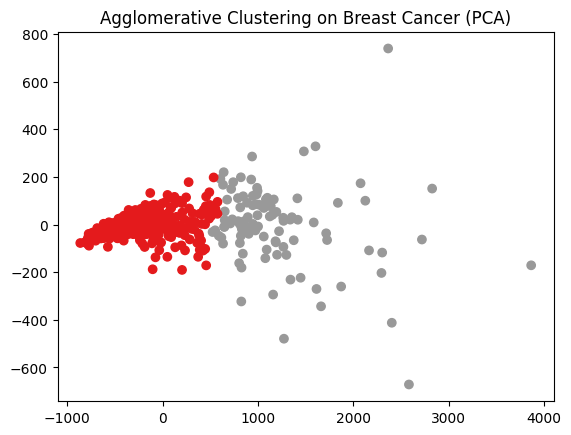

In [22]:
# Q46: PCA + Agglomerative Clustering on Breast Cancer
X = PCA(n_components=2).fit_transform(load_breast_cancer().data)
labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.title("Agglomerative Clustering on Breast Cancer (PCA)")
plt.show()


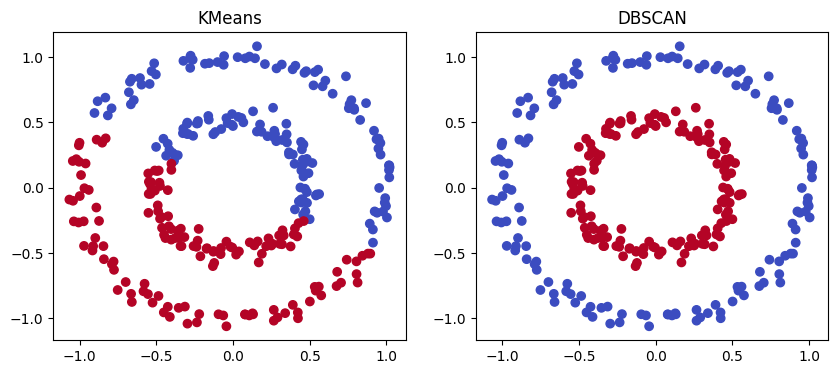

In [23]:
# Q47: Side-by-side: KMeans vs DBSCAN on circles
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("KMeans")
plt.scatter(X[:, 0], X[:, 1], c=KMeans(n_clusters=2).fit_predict(X), cmap='coolwarm')

plt.subplot(1, 2, 2)
plt.title("DBSCAN")
plt.scatter(X[:, 0], X[:, 1], c=DBSCAN(eps=0.2, min_samples=5).fit_predict(X), cmap='coolwarm')

plt.show()


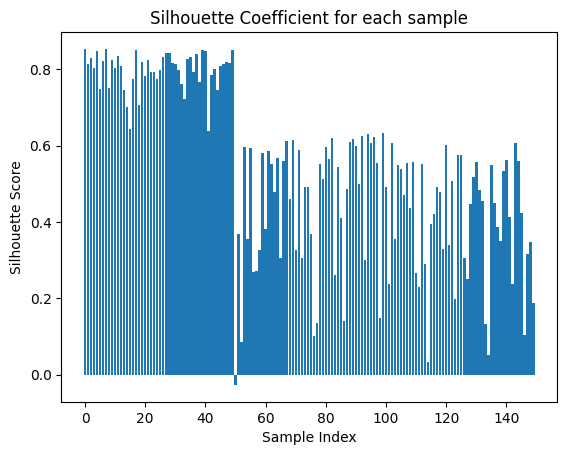

In [24]:
# Q48: Silhouette Coefficients per sample
from sklearn.metrics import silhouette_samples

X = load_iris().data
labels = KMeans(n_clusters=3).fit_predict(X)
sil_vals = silhouette_samples(X, labels)

plt.bar(range(len(sil_vals)), sil_vals)
plt.title("Silhouette Coefficient for each sample")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Score")
plt.show()
